# Pymaceuticals Inc.
---

### Analysis

- From our 'Tumor Size by Drug Regimen' chart we see that Capomulin and Ramicane mice have smaller tumor sizes than those of Infubinol and Ceftamin

- From our 'Capomulin treatment of mouse l509' chart it appears that the drug treatment was effective, but in reality our chart does not start at zero so in 45 days the tumor only shrank 4 mm3.

- From our final chart we see that with a strong correlation of 0.84 a mouse's weight is highly correlated to the average tumor volume
 

In [1]:
# Dependencies and Setup
# %matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_complete = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')

# Display the data table for preview
mouse_study_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(mouse_study_complete.groupby(['Mouse ID']))

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup = mouse_study_complete.loc[mouse_study_complete.duplicated()]
dup_ID = dup['Mouse ID'].values
dup_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
drop_group = mouse_study_complete.loc[mouse_study_complete['Mouse ID'] == dup_ID[0]]
drop_group

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean = mouse_study_complete.loc[mouse_study_complete['Mouse ID'] != dup_ID[0]]
clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean.groupby(['Mouse ID']))

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
clean_group = clean.groupby('Drug Regimen')

mean = clean_group.mean('Tumor Volume (mm3)')['Tumor Volume (mm3)']
median = clean_group.median('Tumor Volume (mm3)')['Tumor Volume (mm3)']
varience = pd.core.groupby.GroupBy.var(clean_group['Tumor Volume (mm3)'])
std = pd.core.groupby.GroupBy.std(clean_group['Tumor Volume (mm3)'])
sem = pd.core.groupby.GroupBy.sem(clean_group['Tumor Volume (mm3)'])

summary1 = pd.DataFrame({'Mean Tumor Volume': mean,
                        'Median Tumor Volume': median,
                        'Tumor Volume Varience': varience,
                        'Tumor Volume Std. Dev.': std,
                        'Tumor Volume Std. Err.': sem})

# summary
summary1

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Varience,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary2 = clean.filter(items=['Drug Regimen','Tumor Volume (mm3)']).groupby('Drug Regimen').agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
clean_group_df = clean_group.count().reset_index()
clean_group_df = clean_group_df.set_index('Drug Regimen')

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

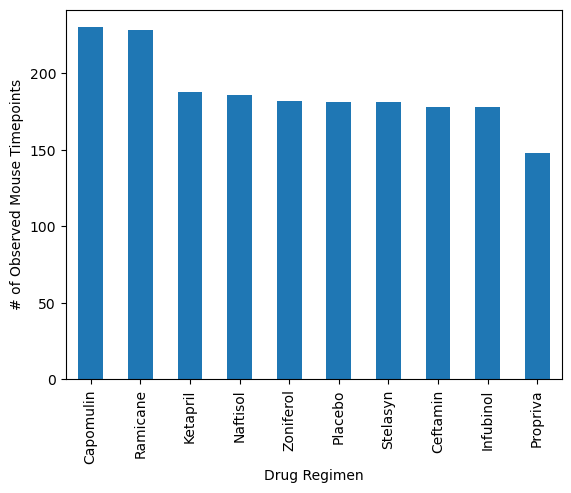

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

bar1 = clean_group_df['Timepoint'].sort_values(ascending=False)
plt.ylabel('# of Observed Mouse Timepoints')
plt.xlabel('Drug Regimen')
plt.xticks(rotation=90)
ax = bar1.plot.bar()
ax

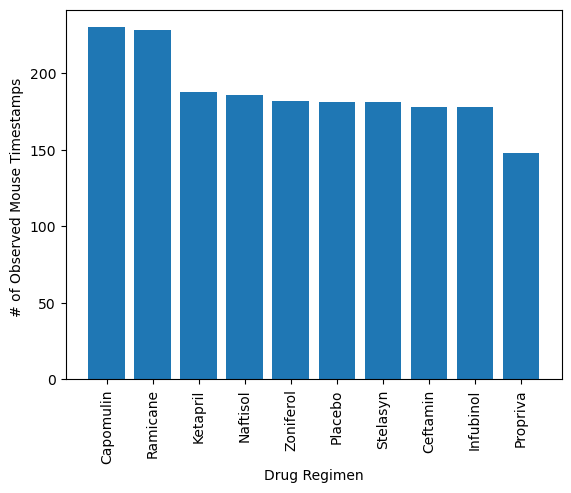

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
bar2 = bar1.reset_index()
x = np.arange(len(bar2))
y = bar2['Timepoint']
labels = bar2['Drug Regimen']

plt.bar(x, y, align='center')
plt.xticks(x, labels, rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timestamps ')
plt.show()

In [12]:
gender = clean.drop_duplicates(subset='Mouse ID')
gender = gender.groupby('Sex').count()['Mouse ID']

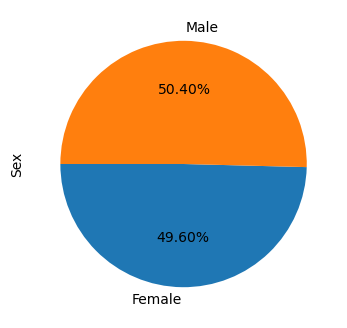

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender.plot.pie(ylabel = 'Sex', startangle=180, autopct='%1.2f%%', figsize=(4,4))
plt.show()

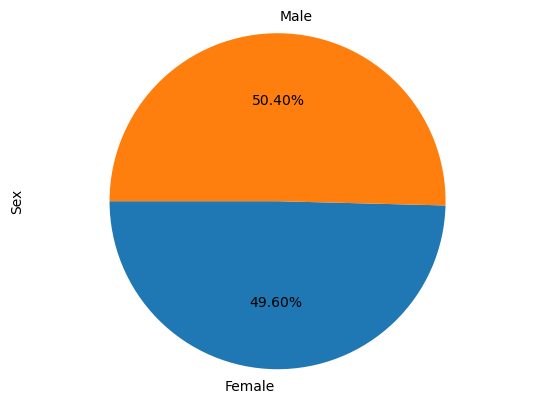

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender, labels=gender.index, autopct='%1.2f%%', startangle=180)
plt.ylabel('Sex')
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
reduced = clean.filter(items=['Mouse ID', 'Timepoint', 'Drug Regimen', 'Tumor Volume (mm3)'])
red_group = reduced.groupby('Mouse ID').max()

cap = red_group.loc[red_group['Drug Regimen']=='Capomulin']
ram = red_group.loc[red_group['Drug Regimen']=='Ramicane']
inf = red_group.loc[red_group['Drug Regimen']=='Infubinol']
ceft = red_group.loc[red_group['Drug Regimen']=='Ceftamin']

In [16]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes    
    # add subset    
    # Determine outliers using upper and lower bounds

treatments = [cap, ram, inf, ceft]
merges = []
tumors = []

for treatment in treatments:
    end = treatment['Timepoint']
    merge = pd.merge(end, reduced, on=['Mouse ID', 'Timepoint'], how='inner')
    merges.append(merge) # May delete this
    tumors.append(merge['Tumor Volume (mm3)'])
    regimen = merge['Drug Regimen'].unique()
    quart = merge['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quart[.25]
    upperq = quart[.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    out = merge.loc[(merge['Tumor Volume (mm3)'] > upper_bound) | (merge['Tumor Volume (mm3)'] < lower_bound)]
    vol = out['Tumor Volume (mm3)']
    mid = ''
    if len(out['Mouse ID'].values) != 0:
        mid = out['Mouse ID'].values[0]
    print(f"{regimen}'s potential outliers:{mid} {vol}")

['Capomulin']'s potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
['Ramicane']'s potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
['Infubinol']'s potential outliers:c326 5    36.321346
Name: Tumor Volume (mm3), dtype: float64
['Ceftamin']'s potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


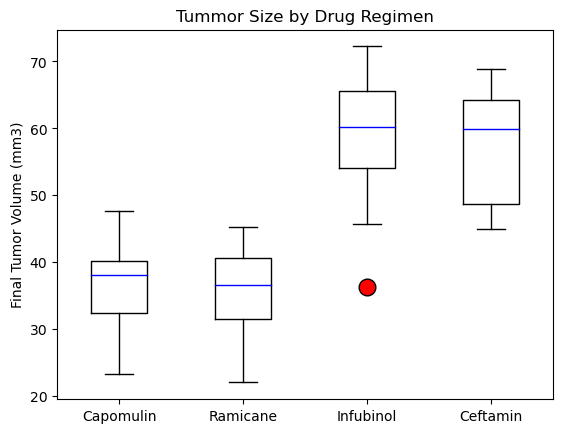

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
labels = ['Capomulin','Ramicane','Infubinol','Ceftamin']
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_title('Tummor Size by Drug Regimen')
ax1.boxplot(tumors, labels=labels,
            flierprops = {'markerfacecolor': 'red', 'markersize': 12},
            medianprops = {'color': 'blue'})
plt.show()


## Line and Scatter Plots

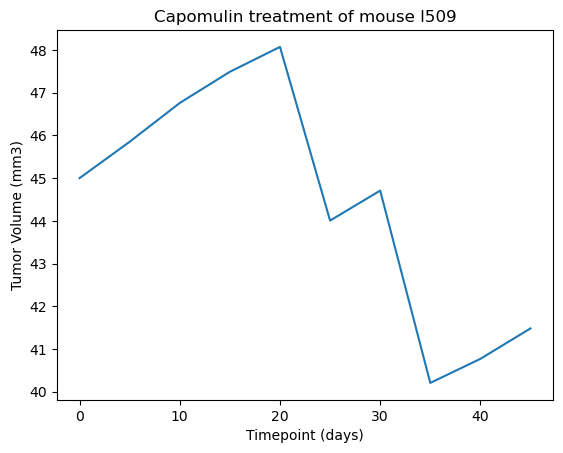

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse = 'l509'
mouse_df = clean.loc[clean['Mouse ID'] == mouse]
drug = mouse_df['Drug Regimen'].values[0]
x = mouse_df['Timepoint'].unique()
y = mouse_df['Tumor Volume (mm3)']
plt.title(f'{drug} treatment of mouse {mouse}')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.plot(x,y, markersize=15)
plt.savefig(f'figs/{mouse}')
plt.show()

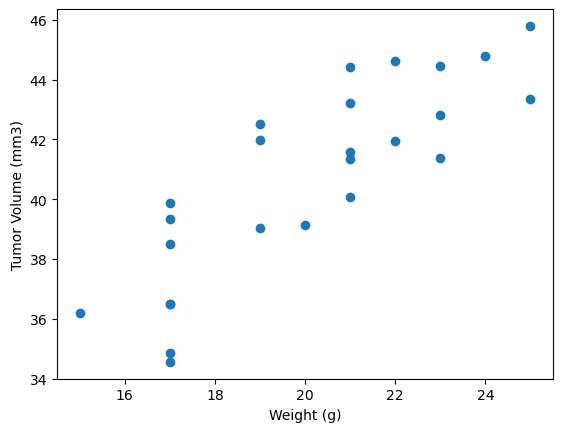

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
reduced = clean.filter(items=['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)', 'Drug Regimen'])
reg = 'Capomulin'
mouse_group = reduced.loc[reduced['Drug Regimen'] == reg].groupby('Mouse ID')

x = mouse_group['Weight (g)'].mean()
y = mouse_group['Tumor Volume (mm3)'].mean()
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.scatter(x,y)
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


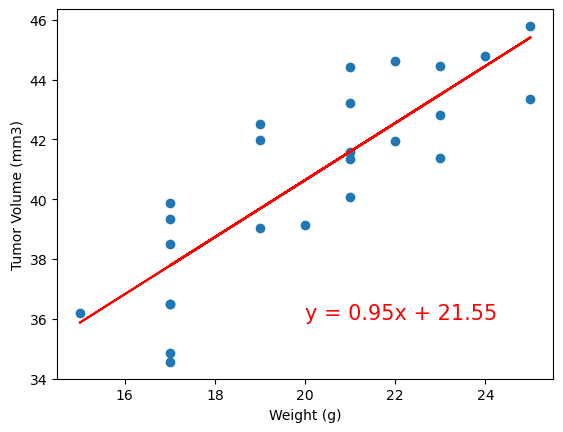

In [20]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
cor = st.pearsonr(x,y)
print(f'The correlation between mouse weight and the average tumor volume is {round(cor[0],2)}')

reduced = clean.filter(items=['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)', 'Drug Regimen'])
reg = 'Capomulin'
mouse_group = reduced.loc[reduced['Drug Regimen'] == reg].groupby('Mouse ID')

x = mouse_group['Weight (g)'].mean()
y = mouse_group['Tumor Volume (mm3)'].mean()

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
regress = slope * x + intercept
line = f'y = {round(slope,2)}x + {round(intercept,2)}'

plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.scatter(x,y)
plt.plot(x, regress, 'r-')
plt.annotate(line, (20,36), fontsize=15, color='red')
plt.show()